# First Foray

DS 5001 Text as Data

## Purpose

We take a raw text file from Project Gutenberg and convert it into a dataframe of tokens. 

We then explore some properties of the data. 

The main idea is to get acquainted with the primary process of convert text into analytical form.

## Set Up

In [27]:
import pandas as pd
import configparser
import matplotlib.pyplot as plt

In [4]:
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

## Import File

In [5]:
!ls -l {data_home}

total 0


In [11]:
src_file = f"{data_home}/gutenberg/pg105.txt"
#/Users/lathangregg/Documents/MSDS/Spring25/DS5001_ETA/data/gutenberg:pg105.txt
src_file = '/Users/lathangregg/Documents/MSDS/Spring25/DS5001_ETA/data/gutenberg:pg105.txt'

In [12]:
lines = open(src_file, 'r').readlines()


In [13]:
lines[:5]

['The Project Gutenberg eBook of Persuasion\n',
 '    \n',
 'This ebook is for the use of anyone anywhere in the United States and\n',
 'most other parts of the world at no cost and with almost no restrictions\n',
 'whatsoever. You may copy it, give it away or re-use it under the terms\n']

In [14]:
lines[-5:]

['\n',
 'This website includes information about Project Gutenberg™,\n',
 'including how to make donations to the Project Gutenberg Literary\n',
 'Archive Foundation, how to help produce our new eBooks, and how to\n',
 'subscribe to our email newsletter to hear about new eBooks.\n']

## Convert to Dataframe

In [15]:
text = pd.DataFrame(lines)

In [16]:
text

,0
0,The Project Gutenberg eBook of Persuasion\n
1,\n
2,This ebook is for the use of anyone anywhere i...
3,most other parts of the world at no cost and w...
4,"whatsoever. You may copy it, give it away or r..."
...,...
8729,\n
8730,This website includes information about Projec...
8731,including how to make donations to the Project...
8732,"Archive Foundation, how to help produce our ne..."


In [17]:
text.sample(10)

,0
8564,"• You provide, in accordance with paragrap..."
1221,\n
3542,"time, perhaps—we know what time does in every ..."
1187,have not seen a soul this whole long morning.”\n
3956,of the house was the consequence.\n
315,name so far. The Kellynch estate should be tra...
5429,could not endure the idea of treachery or levi...
5436,Their minds most dissimilar! Where could have ...
7373,comfortable hope of having acquitted herself w...
3911,"the Harvilles, he seemed unable to satisfy his..."


In [18]:
text.columns = ['line_str']

In [19]:
text.head()

,line_str
0,The Project Gutenberg eBook of Persuasion\n
1,\n
2,This ebook is for the use of anyone anywhere i...
3,most other parts of the world at no cost and w...
4,"whatsoever. You may copy it, give it away or r..."


In [20]:
text.index.name = 'line_num'

In [21]:
text.head()

,line_str
line_num,
0,The Project Gutenberg eBook of Persuasion\n
1,\n
2,This ebook is for the use of anyone anywhere i...
3,most other parts of the world at no cost and w...
4,"whatsoever. You may copy it, give it away or r..."


## Extract Simple Features

In [22]:
text['len'] = text.line_str.str.len()

In [23]:
text.len.describe()

count    8734.000000
mean       55.426380
std        25.438795
min         1.000000
25%        60.000000
50%        68.000000
75%        71.000000
max        79.000000
Name: len, dtype: float64

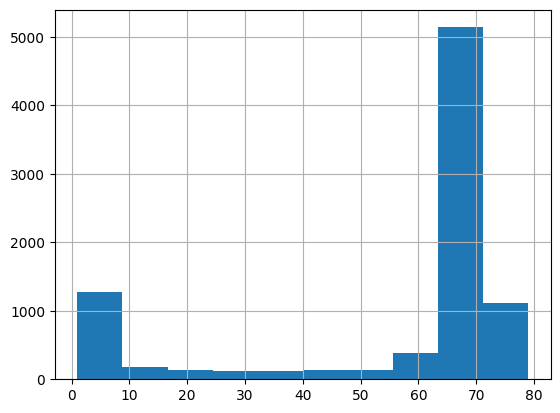

In [28]:
text.len.hist();

**Why two humps?** What might this bimodal distribution indicate?

Let's look at the first hump for characters.

In [29]:
text[text['len'] < 5].sample(10)

,line_str,len
line_num,,
3192,\n,1
329,\n,1
2974,\n,1
8035,\n,1
6342,\n,1
9,\n,1
3212,\n,1
2092,\n,1
4572,\n,1


## Import Again

Now that we know what line breaks mean, we can use this information to import the file with a more accurate structure. Note also that we could have inferred this from visual inspection, too. But the principle that statistical features can provide evidence for structure remains -- we will use this throughout the course.

### Interpret line breaks `\n\n`

In [30]:
chunk_pat = '\n\n'

In [31]:
chunks = open(src_file, 'r').read().split(chunk_pat)

In [32]:
chunks[:5]

['The Project Gutenberg eBook of Persuasion\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.',
 'Title: Persuasion',
 'Author: Jane Austen',
 'Release date: February 1, 1994 [eBook #105]\n                Most recently updated: October 29, 2024',
 'Language: English']

In [33]:
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'

In [34]:
text.head()

,chunk_str
chunk_id,
0,The Project Gutenberg eBook of Persuasion\n ...
1,Title: Persuasion
2,Author: Jane Austen
3,"Release date: February 1, 1994 [eBook #105]\n ..."
4,Language: English


In [35]:
text.shape

(1121, 1)

### Remove remaining breaks

In [36]:
text.chunk_str = text.chunk_str.str.replace('\n+', ' ', regex=True).str.strip()

In [37]:
text.head()

,chunk_str
chunk_id,
0,The Project Gutenberg eBook of Persuasion ...
1,Title: Persuasion
2,Author: Jane Austen
3,"Release date: February 1, 1994 [eBook #105] ..."
4,Language: English


## Convert Lines to Tokens

`K`: A dataframe of tokens.

Note the `expand` argument to the `.split()` method.

In [38]:
K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']

In [39]:
K

token_str
chunk_num token_num           
0         0                The
          1            Project
          2          Gutenberg
          3              eBook
          4                 of
...                        ...
1120      34                to
          35              hear
          36             about
          37               new
          38           eBooks.

[86366 rows x 1 columns]

Broken down into steps

In [34]:
# text.chunk_str.str.split()

In [35]:
# text.chunk_str.str.split(expand=True)

In [36]:
# text.chunk_str.str.split(expand=True).stack()

In [37]:
# text.chunk_str.str.split(expand=True).stack().to_frame('token_str')

In [41]:
K.iloc[100:120]

token_str
chunk_num token_num           
3         7               Most
          8           recently
          9           updated:
          10           October
          11               29,
          12              2024
4         0          Language:
          1            English
5         0           Credits:
          1             Sharon
          2          Partridge
          3                and
          4             Martin
          5               Ward
          6            Revised
          7                 by
          8            Richard
          9           Tonsing.
6         0                ***
          1              START

## Do Some Cleaning

In [42]:
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()

In [43]:
K.sample(10)

,,token_str,term_str
chunk_num,token_num,,
1090,8,the,the
668,30,wife,wife
867,48,cash,cash
941,51,the,the
498,6,the,the
398,193,"manners,",manners
947,5,will,will
1095,82,prepare),prepare
1092,120,1.E.1.,1e1


## Extract a Vocabulary

`V`: A table of terms. As opposed to tokens, which are term _instances_.

**Terms** are symbol **types**.

**Tokens** are symbol **instances**.

In [44]:
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'

In [42]:
V.head(10)

,n
term_str,
the,3501
to,2862
and,2851
of,2684
a,1648
in,1439
was,1336
her,1202
had,1187


Define relative frequency, an estimate of the probability of the word.

In [45]:
V['p'] = V.n / V.n.sum()

In [46]:
V

,n,p
term_str,,
the,3511,0.040653
to,2864,0.033161
and,2847,0.032964
of,2687,0.031112
a,1648,0.019082
...,...,...
801,1,0.000012
5961887,1,0.000012
wwwgutenbergorgcontact,1,0.000012


## Visualize Frequent Words

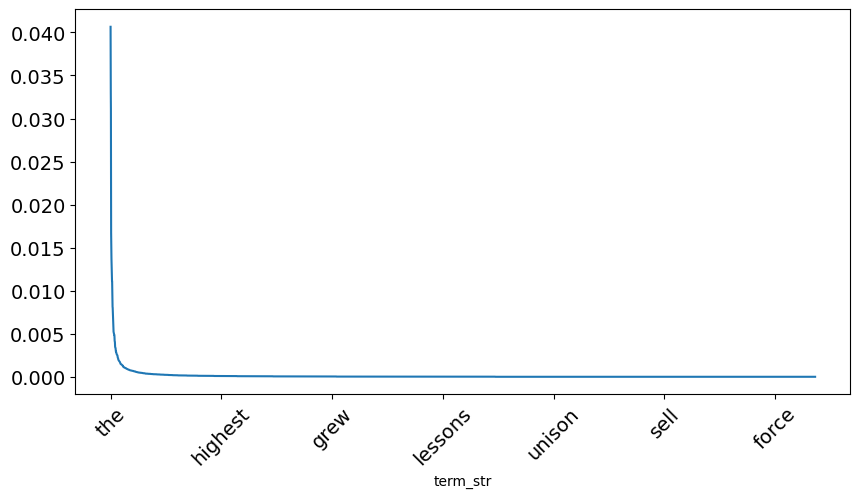

In [47]:
V.p.plot(figsize=(10,5), fontsize=14, rot=45, legend=False);

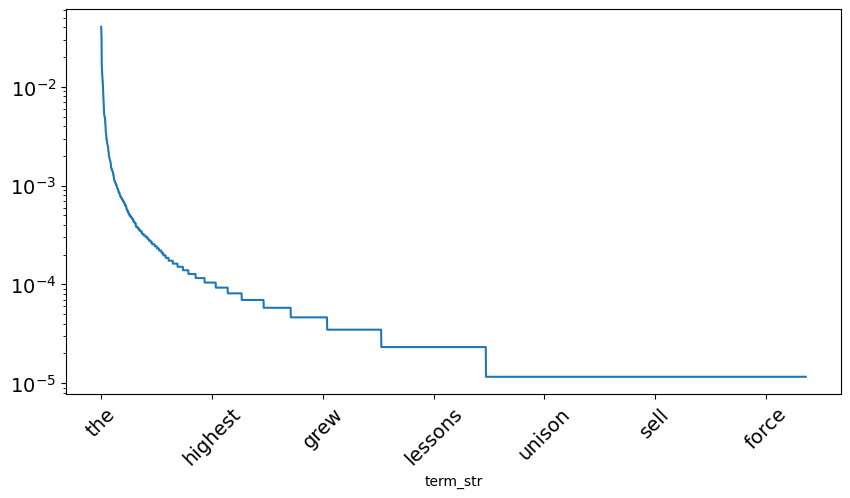

In [48]:
V.p.plot(figsize=(10,5), fontsize=14, rot=45, legend=False, logy=True);

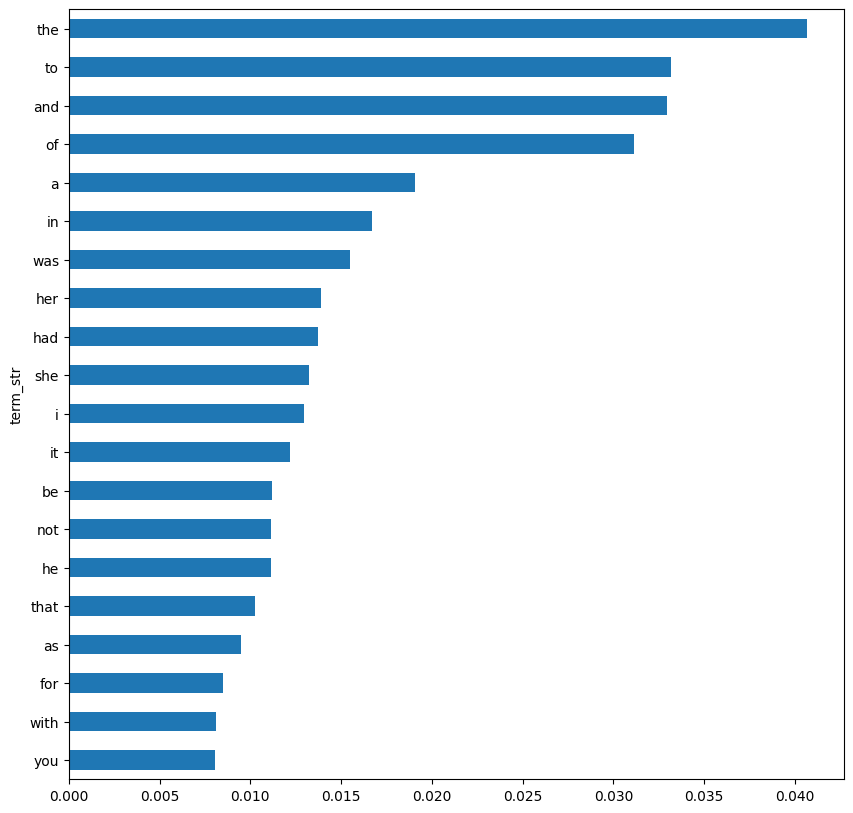

In [49]:
V.p.head(20).sort_values().plot.barh(figsize=(10,10));

## Save Work

In [50]:
K.to_csv(f"{output_dir}/M01-ff-TOKENS.csv")
V.to_csv(f"{output_dir}/M01-ff-VOCAB.csv")

## The The

Why is "the" the most frequent word?

Consider that "the" is "[The Most Powerful Word in the English Language](http://www.bbc.com/culture/story/20200109-is-this-the-most-powerful-word-in-the-english-language)."

> ... ‘the’ lies at the heart of English grammar, having a function rather than a meaning. Words are split into two categories: expressions with a semantic meaning and functional words like ‘the’, ‘to’, ‘for’, with a job to do. ‘The’ can function in multiple ways. This is typical, explains Gary Thoms, assistant professor in linguistics at New York University: “a super high-usage word will often develop a real flexibility”, with different subtle uses that make it hard to define. Helping us understand what is being referred to, ‘the’ makes sense of nouns as a subject or an object. So even someone with a rudimentary grasp of English can tell the difference between ‘I ate an apple’ and ‘I ate the apple’.

Note: function vs. meaning ...

> **Function words are very specific to each language.**<br/><br/>
So, someone who is a native Hindi or Russian speaker is going to have to think very differently when constructing a sentence in English. Murphy says that she has noticed, for instance, that sometimes her Chinese students hedge their bets and include ‘the’ where it is not required. Conversely, Smith describes Russian friends who are so unsure when to use ‘the’ that they sometimes leave a little pause: ‘I went into... bank. I picked up... pen.’ English speakers learning a language with no equivalent of ‘the’ also struggle and might overcompensate by using words like ‘this’ and ‘that’ instead.